# Experimento Computacional 1
Utilizando os métodos de geração de números aleatórios, desenvolva um software que
possibilite gerar as seguintes distribuições de probabilidades:

1-Exponencial

2-Normal (Gaussiana)

3-Qui-Quadrado

4-Poisson

In [2]:
import numpy as np # NÃO foram usadas as funções nativas para gerar distribuições
import matplotlib.pyplot as plt

np.random.seed(1)

Primeiro, vamos gerar uma distribuição uniforme e usá-la para calcular a exponencial.

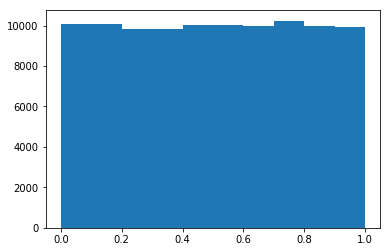

In [4]:
va = np.random.random(99999) # Por padrão, a função random() gera uma distribuição uniforme
plt.hist(va) # va (V.A.) é uma lista de valores no intervalo [0,1)
plt.show()

## Gerando a distribuição Exponencial

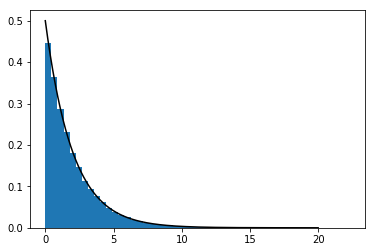

In [5]:
lamb = 0.5
va_exp = -1/lamb*np.log(va) # Inversa da função distribuição cumulativa F_x(X), X é uma v.a.
plt.hist(va_exp, 50, density=True)

x = np.linspace(0, 20, len(va_exp))
y1 = lamb*np.exp(-x*lamb) # função distribuição de probabilidade exponencial, ou f_x(X)
plt.plot(x,y1,'k')
plt.show()


## Gerando a distribuição Normal

Média Gaussiana: 500.0107918959826
Desvio padrão Gaussiano: 9.116704238325486


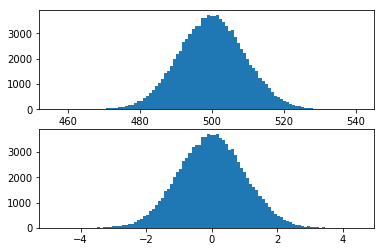

In [8]:
qtdVA = 99999  # Quantidade de valores em cada variável aleatória
va = np.zeros(qtdVA)  # Valores de UMA variável aleatória
va_gauss = np.zeros(qtdVA)  # va com distribuição Gaussiana, ou, Somatório das variáveis aleatórias

for i in range(1000):  # Gerando 1000 variáveis aleatórias
    va = np.random.random(qtdVA) # Gera valores aleatórios no intervalo [0, 1)
    va_gauss = va_gauss + va # Faz o somatório as va's geradas

media_gauss = va_gauss.mean() # Média da va_gauss
desvio_gauss = va_gauss.std() # Desvio padrão da va_gaussiana

print("Média: " + str(media_gauss))
print("Desvio padrão: " + str(desvio_gauss))


Z = (va_gauss - media_gauss)/desvio_gauss


plt.subplot(211)
plt.hist(va_gauss, 100)
plt.subplot(212)
plt.hist(Z,100)

plt.show()


#m = 2
#d = 3

#Y = Z*d + m